In [ ]:
#import pytorch
import torch
from torch import nn

#import torch vision

import torchvision
from  torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt


In [ ]:
#set up training data

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 163kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.18MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.2MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [102]:
type(train_data), type(test_data)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

In [103]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [104]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [105]:
class_name_idx = train_data.class_to_idx
class_name_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [106]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

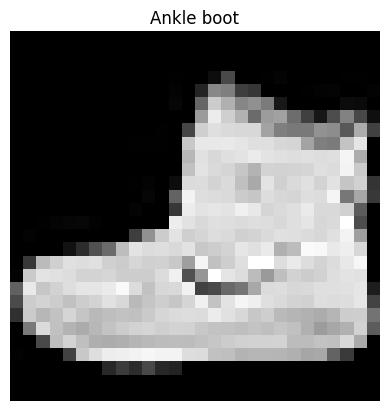

In [107]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="grey")
plt.title(class_name[label])
plt.axis(False)

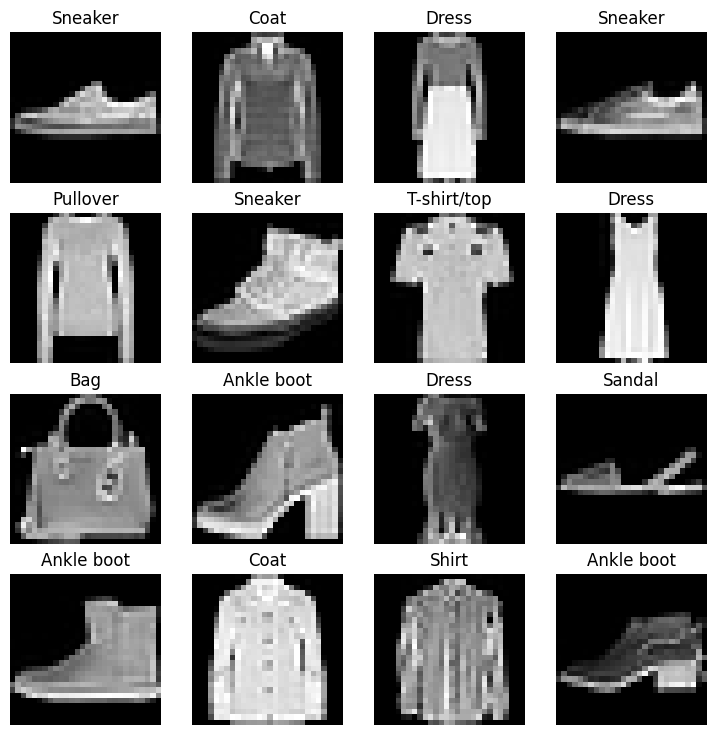

In [108]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="grey")
  plt.title(class_name[label])
  plt.axis(False)

In [201]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True,drop_last= True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False, drop_last = True)

In [202]:
len(train_dataloader), len(test_dataloader)

(1875, 312)

In [203]:
train_featues, train_labels = next(iter(train_dataloader))
train_featues.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

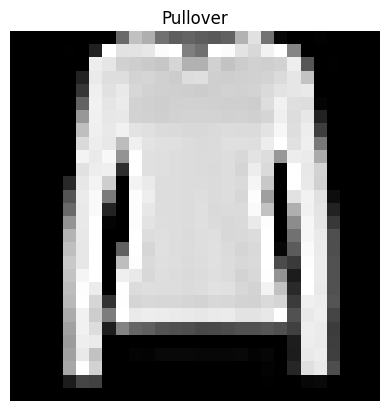

In [204]:
#torch.manual_seed(42)
random_batch_idx = torch.randint(0, len(train_featues), size=[1]).item()
image, label = train_featues[random_batch_idx], train_labels[random_batch_idx]
plt.imshow(image.squeeze(), cmap="grey")
plt.title(class_name[label])
plt.axis(False)

In [205]:
#flatten layer
flatten_layer = nn.Flatten()

In [206]:
#MODEL

class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

model_0 = FashionMNISTModel(input_shape=784, hidden_units=10, output_shape= len(class_name))
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [207]:
device = next(model_0.parameters()).device
print(device)  # Output: either 'cpu' or 'cuda:0'

cpu


In [208]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_0.to(device)
print(f"Model moved to: {device}")

Model moved to: cuda


In [209]:
device = next(model_0.parameters()).device
print(device)  # Output: either 'cpu' or 'cuda:0'

cuda:0


In [210]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [211]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [212]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [213]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_loss = 0

  model_0.train()
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X.to(device), y.to(device)

      test_pred = model_0(X)

      loss = loss_fn(test_pred, y_test)
      test_loss += loss
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"train loss {train_loss}| test_loss {test_loss} | test_acc {test_acc}")

train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start,
                                           end=train_time_end,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
train loss 0.5936607718467712| test_loss 0.20095524191856384 | test_acc 93.75
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
train loss 0.47667035460472107| test_loss 0.3722703456878662 | test_acc 87.5
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
train loss 0.4550774395465851| test_loss 0.17100532352924347 | test_acc 93.75
Train time on cuda:0: 25.863 seconds


In [222]:
all_preds = []
all_labels = []

with torch.inference_mode():
    for X_test, y_test in test_dataloader:
        X_test, y_test = X_test.to(device), y_test.to(device)

        y_logit = model_0(X_test)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        all_preds.append(y_pred.cpu())
        all_labels.append(y_test.cpu())

In [236]:
all_preds = torch.cat(all_preds)   # Shape: [total test samples]
all_labels = torch.cat(all_labels) # Shape: [total test samples]

In [237]:
print("Predicted:", all_preds[:25])
print("Actual:   ", all_labels[:25])


Predicted: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 0, 5, 7, 7,
        1])
Actual:    tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1])


In [238]:
accuracy = (all_preds[:25] == all_labels[:25]).sum().item() / len(all_labels[:25])
print(accuracy)

0.88


In [245]:
def make_predictions(model, data, device= device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [257]:
# visualizing 16 sample from the test set

import random

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# # View the first test sample shape and label
# print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

# fig = plt.figure(figsize=(9, 9))
# rows, cols = 4, 4
# for i in range(1, rows * cols + 1):
#   random_idx = torch.randint(0, len(test_dataloader), size=[1]).item()
#   image, label = all_preds[random_idx], all_labels[random_idx]
#   print(image)
#   break

In [258]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_0,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.2837e-05, 1.6482e-05, 4.3041e-05, 2.1357e-04, 6.7913e-05, 9.9743e-01,
         7.3525e-05, 8.2131e-04, 1.1280e-03, 1.9474e-04],
        [3.2692e-03, 3.0651e-05, 5.2472e-02, 9.0098e-03, 1.5106e-01, 1.6117e-09,
         7.8287e-01, 4.4469e-10, 1.2917e-03, 2.9120e-10]])

In [259]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 6, 3, 1, 4, 3, 4])

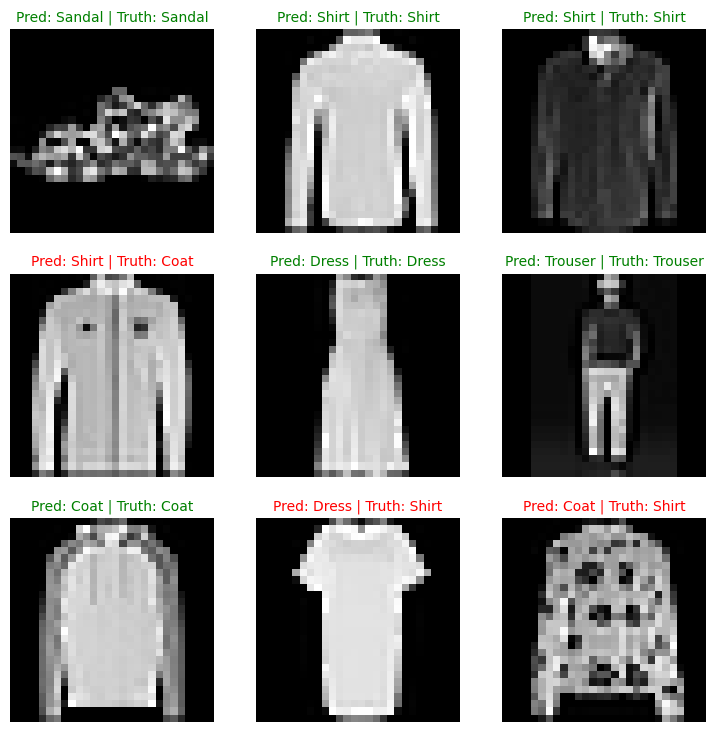

In [260]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_name[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [179]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']